In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Random")
Pkg.add("CairoMakie")
Pkg.add("Statistics")
Pkg.add("Distributions")
Pkg.add("LinearAlgebra")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Dow

Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter9\Project.toml`
  [13f3f980] CairoMakie v0.12.5
  [31c24e10] Distributions v0.25.110
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
  [10745b16] Statistics v1.10.0


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\rEu75\src\scenes.jl:227


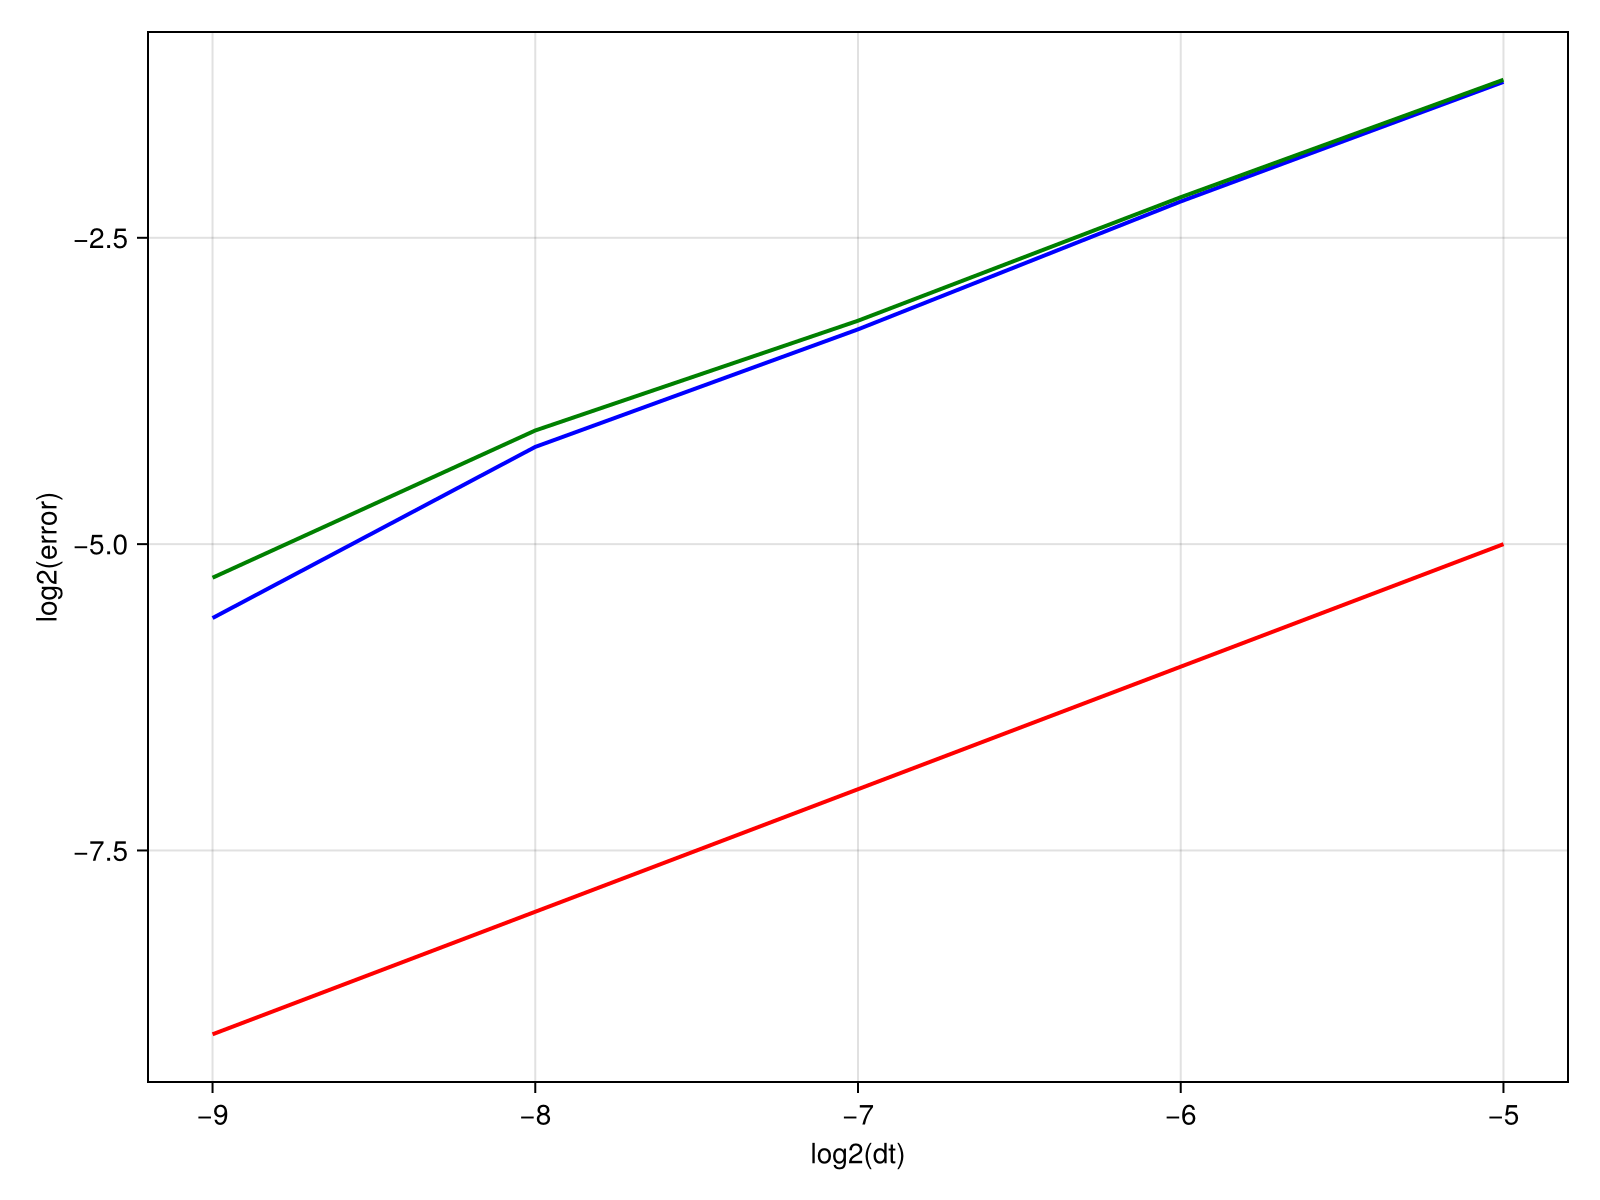

In [2]:
# Translated from Matlab to Julia

using Random, CairoMakie, Statistics

Random.seed!(1234)

mu = 2
sigma = 0.1

Xzero = 1

T = 1

M = Int(5e4)

Xem = zeros(5)
confWidth = zeros(5)

for p in 1:5
    dt = 2.0^(p - 10)
    N = Int(T / dt)

    Xtemp = ones(M).*Xzero

    for j in 1:N
        Winc = sqrt(dt)*randn(M)
        Xtemp = Xtemp .+ mu*Xtemp*dt .+ sigma*Xtemp.*Winc
    end

    Xem[p] = mean(Xtemp)
    confWidth[p] = 2 * 1.96 * std(Xtemp) / sqrt(M)
end

dt = 2.0^(-11)
N = Int(T / dt)
Xpath = fill(Xzero, M)
for j in 1:N
    Winc = sqrt(dt)*randn(M)
    Xpath = Xpath .+ mu*Xpath*dt .+ sigma*Xpath.*Winc
end
expectedPathEnd = mean(Xpath)

XerrExact = abs.(Xem .- exp(mu * T))
log2_XerrExact = log2.(XerrExact)
Xerr = abs.(Xem .- expectedPathEnd)
log2_Xerr = log2.(Xerr)

fig = Figure(resolution = (800, 600))

ax = Axis(fig[1, 1], xlabel = "log2(dt)", ylabel = "log2(error)")

lines!(ax, log2.(2.0 .^ ((1:5) .- 10)), log2_Xerr, color = :blue, linewidth = 2)
lines!(ax, log2.(2.0 .^ ((1:5) .- 10)), log2_XerrExact, color = :green, linewidth = 2)
lines!(ax, log2.(2.0 .^ ((1:5) .- 10)), log2.(2.0 .^ ((1:5) .- 10)), color = :red, linewidth = 2)

fig

In [3]:
println("Max CI width: ", maximum(confWidth))

Max CI width: 0.012914387633462475


In [4]:
# Least square

using LinearAlgebra

A = hcat(ones(5), log2.(2.0 .^ ((1:5) .- 10)))
b = log2_Xerr
bExact = log2_XerrExact

x = A \ b
xExact = A \ bExact

println("The slope is ", x[2])
println("The intercept is ", x[1])
println("The residual is ", norm(A*x - b))
println("The slope (using exact expected) is ", xExact[2])
println("The intercept (using exact expected) is ", xExact[1])
println("The residual (using exact expected) is ", norm(A*xExact - bExact))
println("The diff between exact and computed end point is " , abs(expectedPathEnd - exp(mu * T)))

The slope is 1.0753682310644972
The intercept is 4.229931056342376
The residual is 0.24733063793739607
The slope (using exact expected) is 1.0031543296168453
The intercept (using exact expected) is 3.841597806024193
The residual (using exact expected) is 0.1461793380329294
The diff between exact and computed end point is 0.0052708150163764955


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\rEu75\src\scenes.jl:227


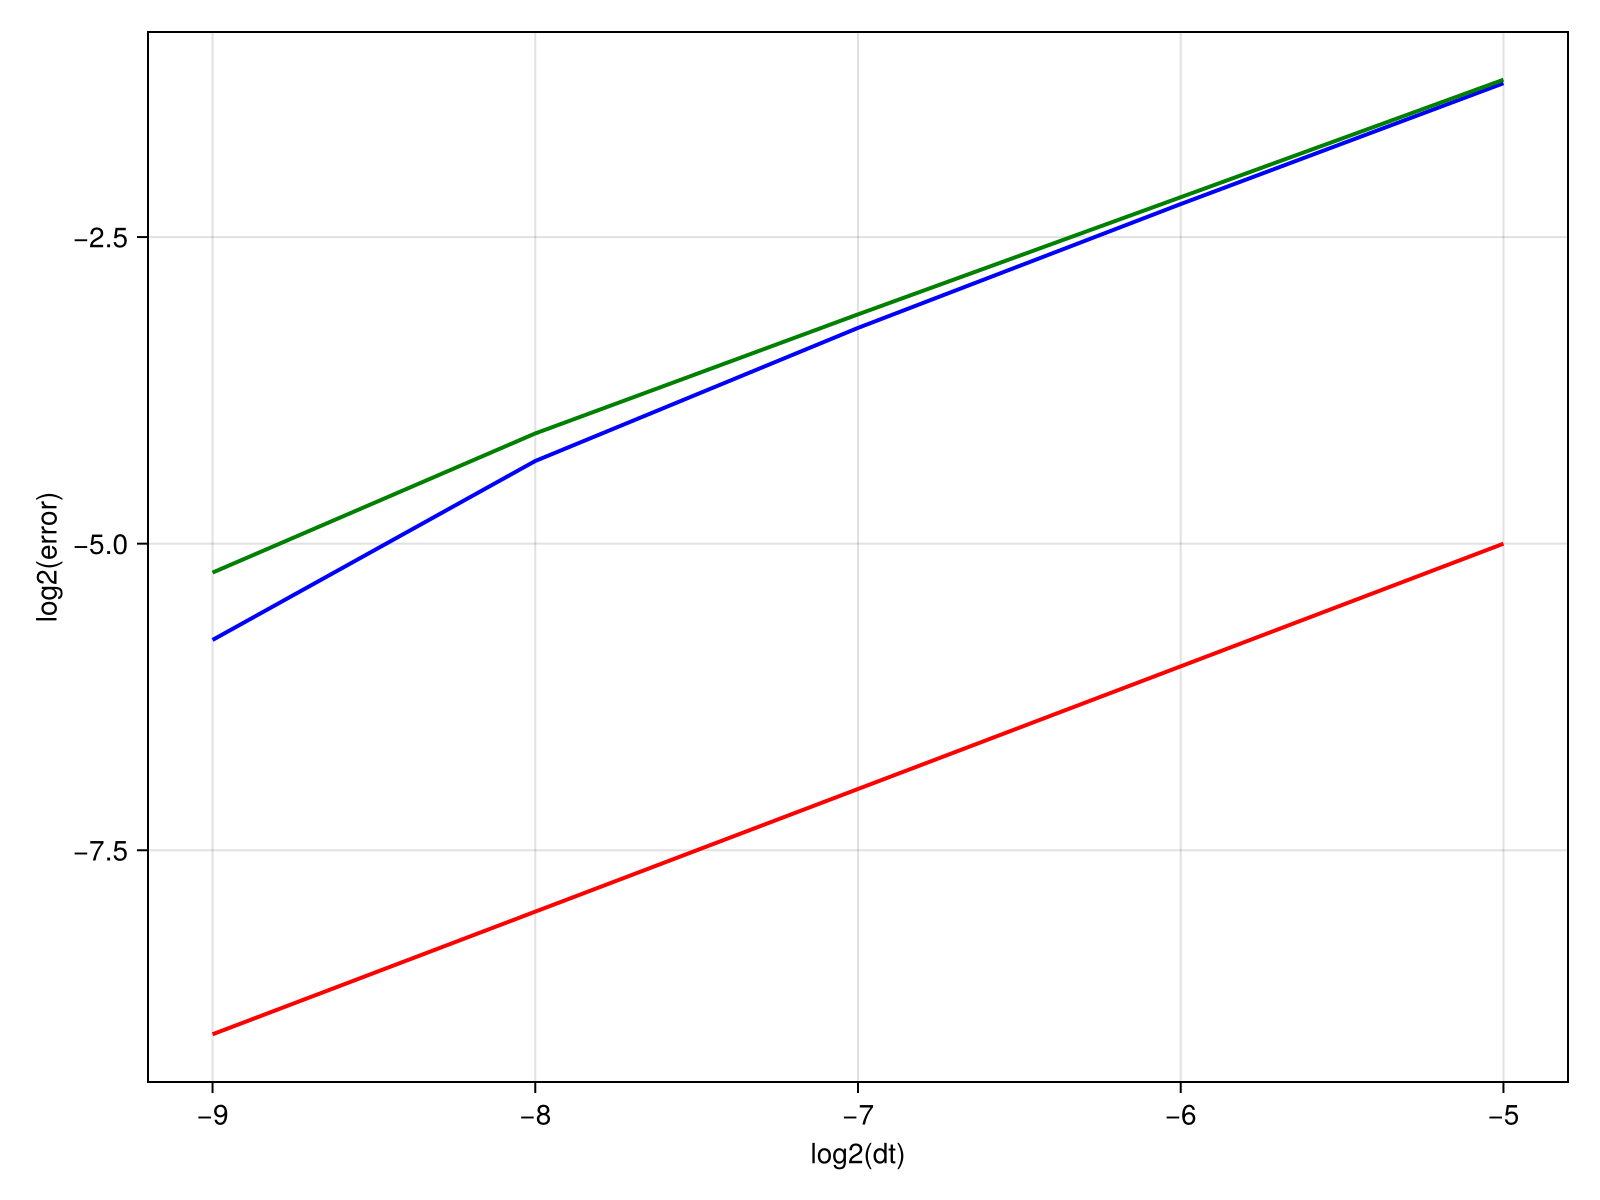

In [5]:
using Random, CairoMakie, Statistics, Distributions

Random.seed!(1234)

mu = 2
sigma = 0.1

Xzero = 1

T = 1

M = Int(5e4)

Xem = zeros(5)
confWidth = zeros(5)

for p in 1:5
    dt = 2.0^(p - 10)
    N = Int(T / dt)

    Xtemp = ones(M).*Xzero

    for j in 1:N
        Winc = sqrt(dt)*(2*rand(Uniform(0, 1), M) .- 1)
        Xtemp = Xtemp .+ mu*Xtemp*dt .+ sigma*Xtemp.*Winc
    end

    Xem[p] = mean(Xtemp)
    confWidth[p] = 2 * 1.96 * std(Xtemp) / sqrt(M)
end

dt = 2.0^(-11)
N = Int(T / dt)
Xpath = fill(Xzero, M)
for j in 1:N
    # Winc = sqrt(dt)*randn(M)
    Winc = sqrt(dt)*(2*rand(Uniform(0, 1), M) .- 1)
    Xpath = Xpath .+ mu*Xpath*dt .+ sigma*Xpath.*Winc
end
expectedPathEnd = mean(Xpath)

XerrExact = abs.(Xem .- exp(mu * T))
log2_XerrExact = log2.(XerrExact)
Xerr = abs.(Xem .- expectedPathEnd)
log2_Xerr = log2.(Xerr)

fig = Figure(resolution = (800, 600))

ax = Axis(fig[1, 1], xlabel = "log2(dt)", ylabel = "log2(error)")

lines!(ax, log2.(2.0 .^ ((1:5) .- 10)), log2_Xerr, color = :blue, linewidth = 2)
lines!(ax, log2.(2.0 .^ ((1:5) .- 10)), log2_XerrExact, color = :green, linewidth = 2)
lines!(ax, log2.(2.0 .^ ((1:5) .- 10)), log2.(2.0 .^ ((1:5) .- 10)), color = :red, linewidth = 2)

fig

In [6]:
println("Max CI width: ", maximum(confWidth))

Max CI width: 0.0074887043868967895


In [7]:
using LinearAlgebra

A = hcat(ones(5), log2.(2.0 .^ ((1:5) .- 10)))
b = log2_Xerr
bExact = log2_XerrExact

x = A \ b
xExact = A \ bExact

println("The slope is ", x[2])
println("The intercept is ", x[1])
println("The residual is ", norm(A*x - b))
println("The slope (using exact expected) is ", xExact[2])
println("The intercept (using exact expected) is ", xExact[1])
println("The residual (using exact expected) is ", norm(A*xExact - bExact))
println("The diff between exact and computed end point is " , abs(expectedPathEnd - exp(mu * T)))

The slope is 1.1173236455063715
The intercept is 4.4556853451132525
The residual is 0.2965721440920011
The slope (using exact expected) is 0.9962572121489027
The intercept (using exact expected) is 3.8019529162748267
The residual (using exact expected) is 0.11290476266937771
The diff between exact and computed end point is 0.008405120430758473
